In [725]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import tweepy

%matplotlib inline

# Gather Data
We'll start off by gathering all the data we'll need to analyze tweets from the We Rate Dogs Twitter account.

## Tweets Archive Dataframe
Since we have our archive file already, we will save it to a dataframe.

In [726]:
# Create archive
archive = pd.read_csv('twitter-archive-enhanced.csv')

## Image Prediction Dataframe
Next, we'll automagically retrieve the image prediction file and save it to a dataframe as well.

In [727]:
# Retrieve TSV from website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
predictions = pd.read_csv('image_predictions.tsv', sep='\t')

## Tweet Metadata Dataframe
To get our metadata, we'll have to use the Twitter API. We'll add our consumer and access information, connect to the API, and then grab the full metadata for each tweet ID in our archive file.

In [728]:
# Connect to the API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [729]:
# Create a list of IDs and use it to grab the full metadata
tweet_ids = list(archive.tweet_id)

with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
            print(tweet_id)
        except:
            continue

SyntaxError: invalid syntax (<ipython-input-729-62d0ecf9ef57>, line 1)

In [730]:
# Save the data to a dataframe
tweet_data = pd.read_json('tweet_json.txt', lines=True, encoding='utf-8')

## Make Working Copies
Finally, we will make copies of our datafames to clean.

In [731]:
archive_copy = archive.copy()
predictions_copy = predictions.copy()
tweet_data_copy = tweet_data.copy()

# Assess
We will start out by visually assessing the data. This will help us identify what each field means, what datatypes we are dealing with, and what data might be missing.

## Archive Assessment
We'll take a look at the raw data:

In [732]:
archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## Archive Info
Now we'll look at what datatypes we are dealing with:

In [733]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Archive Quality and Tidiness
Now we'll take a look at the tidiness of the archive data.

Looking at the text field, I noticed there were some "\& amp;"s instead of proper ampersands.

In [734]:
archive_copy['text'][archive_copy['text'].str.contains('&amp;')]

262     Meet Indie. She's not a fan of baths but she's...
273     RT @dog_rates: This is Pipsy. He is a fluffbal...
320     Meet Chester (bottom) &amp; Harold (top). They...
461     Say hello to Eugene &amp; Patti Melt. No matte...
485     RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
799     Meet Roosevelt. He's preparing for takeoff. Ma...
889     Meet Maggie &amp; Lila. Maggie is the doggo, L...
898     This is Lilli Bee &amp; Honey Bear. Unfortunat...
976     Meet Jax &amp; Jil. Jil is yelling the pledge ...
1104    Meet Buckley. His family &amp; some neighbors ...
1179    Meet Sid &amp; Murphy. Murphy floats alongside...
1199    Meet Jennifur. She's supposed to be navigating...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1274    From left to right:\nCletus, Jerome, Alejandro...
1366    Meet Rambo &amp; Kiwi. Rambo's the pup with th...
1421    Meet Beau &amp; Wilbur. Wilbur stole Beau's be...
1465    Meet O

Something that sticks out to me is the inclusion of four fields: doggo, floofer, pupper, and puppo. These sound suspiciously similar and could likely be melted into one field. Sure enough, a quick look  confirms this:

In [735]:
archive_copy.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [736]:
archive_copy.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [737]:
archive_copy.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [738]:
archive_copy.puppo.unique()

array(['None', 'puppo'], dtype=object)

Moving on, let's see what the data looks like in the name column. As we can see, there is a lot of junk data. Specifically, when a name is lowercase, it is not a name at all.

In [739]:
archive_copy.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

We can see there are 100 of these erroneous records.

In [740]:
archive_copy['name'].loc[archive_copy['name'].str.islower()].count()

109

In the 'Names' field, we can also see that unknown values are represented by the string 'None'.

In [741]:
archive_copy['name'].loc[archive_copy['name'] == 'None'] 

5       None
7       None
12      None
24      None
25      None
30      None
32      None
35      None
37      None
41      None
42      None
47      None
55      None
59      None
62      None
64      None
72      None
78      None
83      None
88      None
89      None
93      None
96      None
99      None
100     None
101     None
103     None
110     None
112     None
113     None
        ... 
2294    None
2298    None
2299    None
2301    None
2305    None
2306    None
2307    None
2310    None
2316    None
2320    None
2321    None
2322    None
2323    None
2324    None
2328    None
2329    None
2330    None
2331    None
2332    None
2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2351    None
2355    None
Name: name, Length: 745, dtype: object

The expanded_urls field seems to be where pictures associated with tweets are kept. We can see that some of these values are missing.

In [742]:
archive_copy.expanded_urls.isnull().sum()

59

In the source, we can see that there is a lot of HTML clutter. A quick shows that there are only three unique values here: one for iPhones, one for browsers, adn one for TweetDeck.

In [743]:
archive_copy['source'].head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [744]:
archive_copy['source'].nunique()

4

## Predictions Assessment
Raw data:

In [745]:
predictions_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


And the info:

In [746]:
predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Tweet Data Assessment
We'll look at the full raw data:

In [747]:
tweet_data_copy

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38736,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8570,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33193,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6299,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24994,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4184,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42137,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8697,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40275,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9459,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20188,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,3134,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11829,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,2087,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",65425,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,19009,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27750,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4284,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31896,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,7460,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


And we'll look at the info:

In [748]:
tweet_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
full_text                        2345 non-null object
geo                              0 non-null float64
id                               2345 non-null int64
id_str                           2345 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

Something looks off here. The number of rows we have in each dataframe appears to be different:

In [749]:
print(archive_copy.shape[0], predictions_copy.shape[0], tweet_data_copy.shape[0])

2356 2075 2345


We can also see that there is an id field and an id_str field, but both have a type of int. These fields looks like they should match, but don't always.

In [750]:
tweet_data_copy[['id', 'id_str']].head()

,id,id_str
0,892420643555336193,892420643555336192
1,892177421306343426,892177421306343424
2,891815181378084864,891815181378084864
3,891689557279858688,891689557279858688
4,891327558926688256,891327558926688256


## Assessment Conclusion

### Tidiness
- Our data is in three dataframes from three different sources and needs to be joined together.
- The dog descriptor fields need to be melted down into a single field.

### Quality
- Each dataframe has a different number of observations.
- The tweet_data dataframe has fields 'id' and 'id_str', both of which are type int. They are occassionally different IDs.
- The name field in our archive contains a lot of data which isn't a name at all.
- The name field has manual entries of string 'None' instead of NaN.
- No data for many fields.
- Source field has HTML in it.
- Fix datatypes
- Correcting ampersands.
- Timestamps need correct datetime format.

# Cleaning
Let's clean our code and get it into a usable state.

## Melt Dog Adjectives
We'll start off by melting the four dog adjectives into a single column.

In [751]:
archive_copy['dog_description'] = archive_copy['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

And we'll drop the old columns:

In [752]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
archive_copy.drop(columns, axis=1, inplace=True)

And we'll verify that it worked:

In [753]:
archive_copy['dog_description'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [754]:
archive_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_description
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


## Join Dataframes
Next, we'll join our three dataframes together. We'll use the archives table as the master table. We will drop redundant data.

This will solve two problems at the same time: not only will this tidy our data by combing it into a single dataframe, it will also remove rows that have no corresponding via inner join.

In [755]:
archive_copy = archive_copy.drop(['text', 'source', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [756]:
archive_copy = pd.merge(left=archive_copy, right=tweet_data_copy, left_on='tweet_id', right_on='id', how='inner')

In [757]:
archive_copy = archive_copy.merge(predictions_copy, on='tweet_id', how='inner')

In [758]:
archive_copy = archive_copy.drop('id', axis=1)

Let's test to make sure it worked:

In [759]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 52 columns):
tweet_id                         2069 non-null int64
timestamp                        2069 non-null object
retweeted_status_id              75 non-null float64
retweeted_status_user_id         75 non-null float64
retweeted_status_timestamp       75 non-null object
expanded_urls                    2069 non-null object
rating_numerator                 2069 non-null int64
rating_denominator               2069 non-null int64
name                             2069 non-null object
dog_description                  338 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2069 non-null datetime64[ns]
display_text_range               2069 non-null object
entities                         2069 non-null object
extended_entities                2069 non-null object
favorite_count                   

In [760]:
archive_copy.head()

,tweet_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_description,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Fix IDs
Our 'id' and 'id_str' fields have two things wrong with them: they are both type int, when id_str should be a string, and occassionally the IDs do not match. A little bit of research shows that the id_str field is derived from id, so we will fix this by copying the id field to id_str and then changing the type to string.

In [761]:
archive_copy['id_str'] = archive_copy['tweet_id'].astype(str)

And we'll verify it:

In [762]:
archive_copy[['tweet_id', 'id_str']].head()

,tweet_id,id_str
0,892420643555336193,892420643555336193
1,892177421306343426,892177421306343426
2,891815181378084864,891815181378084864
3,891689557279858688,891689557279858688
4,891327558926688256,891327558926688256


In [763]:
archive_copy[['tweet_id', 'id_str']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 2 columns):
tweet_id    2069 non-null int64
id_str      2069 non-null object
dtypes: int64(1), object(1)
memory usage: 48.5+ KB


## Fix Names
We will locate every entry that isn't a name and replace it with the string 'None'. Note that these values should be NaN, but the dataset treats such values as string 'None'. We will fix this in the next step.

In [764]:
archive_copy['name'].loc[archive_copy['name'].str.islower()] = 'None'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


And verify:

In [765]:
archive_copy['name'].loc[archive_copy['name'].str.islower()]

Series([], Name: name, dtype: object)

## Fix Strings of 'None' in Names
Now that the data in the names field is consolidated, we'll convert all of the string 'None' values to a proper NaN. 

In [766]:
archive_copy['name'] = archive_copy['name'].replace('None', np.NaN)

And verify:

In [767]:
archive_copy.loc[archive_copy['name'] == 'None']

,tweet_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_description,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Eliminate Fields with No Data
As we can see below, the following fields have no data: contributors, coordinates, geo, quoted_status, quoted_status_id, quoted_status_id_str, and quoted_status_permalink. We can simply eliminate these unhelpful fields.

In [768]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 52 columns):
tweet_id                         2069 non-null int64
timestamp                        2069 non-null object
retweeted_status_id              75 non-null float64
retweeted_status_user_id         75 non-null float64
retweeted_status_timestamp       75 non-null object
expanded_urls                    2069 non-null object
rating_numerator                 2069 non-null int64
rating_denominator               2069 non-null int64
name                             1394 non-null object
dog_description                  338 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2069 non-null datetime64[ns]
display_text_range               2069 non-null object
entities                         2069 non-null object
extended_entities                2069 non-null object
favorite_count                   

In [769]:
columns = ['contributors', 'coordinates', 'geo', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink']
archive_copy.drop(columns, axis=1, inplace=True)

And test it:

In [770]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 45 columns):
tweet_id                         2069 non-null int64
timestamp                        2069 non-null object
retweeted_status_id              75 non-null float64
retweeted_status_user_id         75 non-null float64
retweeted_status_timestamp       75 non-null object
expanded_urls                    2069 non-null object
rating_numerator                 2069 non-null int64
rating_denominator               2069 non-null int64
name                             1394 non-null object
dog_description                  338 non-null object
created_at                       2069 non-null datetime64[ns]
display_text_range               2069 non-null object
entities                         2069 non-null object
extended_entities                2069 non-null object
favorite_count                   2069 non-null int64
favorited                        2069 non-null bool
full_text                       

## Remove HTML From Source Field
The source field HTML should be removed as it is simply noise.

In [771]:
archive_copy['source'] = archive_copy['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_copy['source'] = archive_copy['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_copy['source'] = archive_copy['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [772]:
archive_copy['source'].sample(10)

1824    Twitter for iPhone
1246    Twitter for iPhone
1073    Twitter for iPhone
355     Twitter for iPhone
994     Twitter for iPhone
1158    Twitter for iPhone
723     Twitter for iPhone
27      Twitter for iPhone
1769    Twitter for iPhone
705     Twitter for iPhone
Name: source, dtype: object

## Fix Datatypes
Some fields would be more accurate with a different datatype.

In [773]:
archive_copy['in_reply_to_status_id'] = archive_copy['in_reply_to_status_id'].astype('str')
archive_copy['in_reply_to_user_id'] = archive_copy['in_reply_to_user_id'].astype('str')
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])
archive_copy['dog_description'] = archive_copy['dog_description'].astype('str')

In [774]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 45 columns):
tweet_id                         2069 non-null int64
timestamp                        2069 non-null datetime64[ns]
retweeted_status_id              75 non-null float64
retweeted_status_user_id         75 non-null float64
retweeted_status_timestamp       75 non-null object
expanded_urls                    2069 non-null object
rating_numerator                 2069 non-null int64
rating_denominator               2069 non-null int64
name                             1394 non-null object
dog_description                  2069 non-null object
created_at                       2069 non-null datetime64[ns]
display_text_range               2069 non-null object
entities                         2069 non-null object
extended_entities                2069 non-null object
favorite_count                   2069 non-null int64
favorited                        2069 non-null bool
full_text              

## Correct Ampersands
In the text field, some entries contain garbage after the ampersand symbol.

In [775]:
archive_copy['full_text'] = archive_copy['full_text'].str.replace('&amp;', '&')

In [776]:
archive_copy['full_text'][archive_copy['full_text'].str.contains('&amp;')]

Series([], Name: full_text, dtype: object)

## Datetime Formatting
Our datetime fields need to be formatted correctly.

In [787]:
datetimes = ['timestamp', 'created_at']

for field in datetimes:
    archive_copy[field] = archive_copy[field].astype('datetime64[ns]')

And let's test it:

In [788]:
archive_copy['timestamp'].dtype

dtype('<M8[ns]')

# Store To Dataframe
Now that we've cleaned the data, we'll store it so we can perform analysis on it.

In [789]:
archive_copy.to_csv('twitter_archive_master.csv')

# Insights

In [790]:
df = pd.read_csv('twitter_archive_master.csv')

First, we'll take a look at the activity of WeRateDogs. We can see that the account started off with a very high number of tweets, but soon found a sustainable rhythm. For the past few years, the number of tweets has been slowly trending downward.

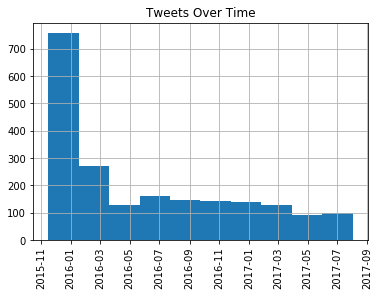

In [795]:
df['timestamp'].astype('datetime64[ns]').hist(xrot=90);
plt.title('Tweets Over Time');

This is an interesting finding that begs for some follow up. What caused the enormous drop in activity, and why did the number of tweets stabilize? When we dive deeper, we can see that despite the number of tweets going down, the average popularity of each tweet goes up. We would want to explore this from more angles before making absolute statements, but we can tentatively conclude that the number of tweets went down because the account grew more popular and simply didn't need to tweet as much.

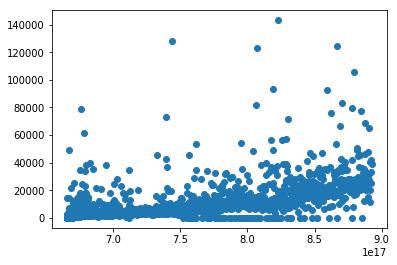

In [821]:
plt.scatter(x=df['tweet_id'], y=df['favorite_count']);

WeRateDogs is known for its humerous rating of dogs, specifically that the ratings are almost always above 100%. We can combine the numerators and denominators to see what the average rating looks like. We can see that, despite hyperbolous ratings, the average tends to be only slightly higher than 1. The max is a whopping 177.

In [793]:
df['score'] = df['rating_numerator'] / df['rating_denominator']

df['score'].describe()

count    2069.000000
mean        1.169591
std         3.992727
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: score, dtype: float64

I would also like to look at the descriptions to see if any are favored. We can see that most dogs are classified as 'puppers' (I would have guessed 'doggos'. Floofer is hardly ever used at all.

In [794]:
df['dog_description'].value_counts()

pupper     231
doggo       75
puppo       29
floofer      3
Name: dog_description, dtype: int64

In a similar vein, and for my own personal curiosity, I would like to see how popular each dog name is! We can see that names like Charlie, Penny, and Oliver are common, as we could probably expect. The names with only one instance can be pretty fun, like Michelangelope, Chuq, and Enchilada.

In [822]:
df['name'].value_counts()

Charlie     11
Penny       10
Tucker      10
Cooper      10
Oliver      10
Lucy        10
Sadie        8
Lola         8
Bo           8
Winston      8
Daisy        7
Toby         7
Jax          6
Bailey       6
Scout        6
Koda         6
Bella        6
Rusty        6
Milo         6
Dave         6
Stanley      6
Chester      5
Larry        5
Louis        5
Buddy        5
Alfie        5
Leo          5
Oscar        5
Reggie       4
Scooter      4
            ..
Tyrone       1
Rontu        1
Koko         1
Mona         1
Clybe        1
Chesney      1
Dawn         1
Theo         1
Bruno        1
Rhino        1
Shikha       1
Cecil        1
Kaiya        1
Timison      1
Wesley       1
Jed          1
Stormy       1
Pete         1
Aubie        1
Logan        1
Ralphé       1
Tango        1
Sparky       1
Dante        1
Godi         1
Sephie       1
Bobble       1
Rodney       1
Winifred     1
Blipson      1
Name: name, Length: 913, dtype: int64